In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("medical_insurance.csv")

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df_dummied = pd.concat([df, pd.get_dummies(df[['sex', 'smoker', 'region']])], axis=1)

In [7]:
df_dummied.drop(columns=['sex', 'smoker', 'region'], inplace=True)

In [8]:
df_dummied.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


In [1]:
pip install matplotlib numpy seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

NameError: name 'df' is not defined

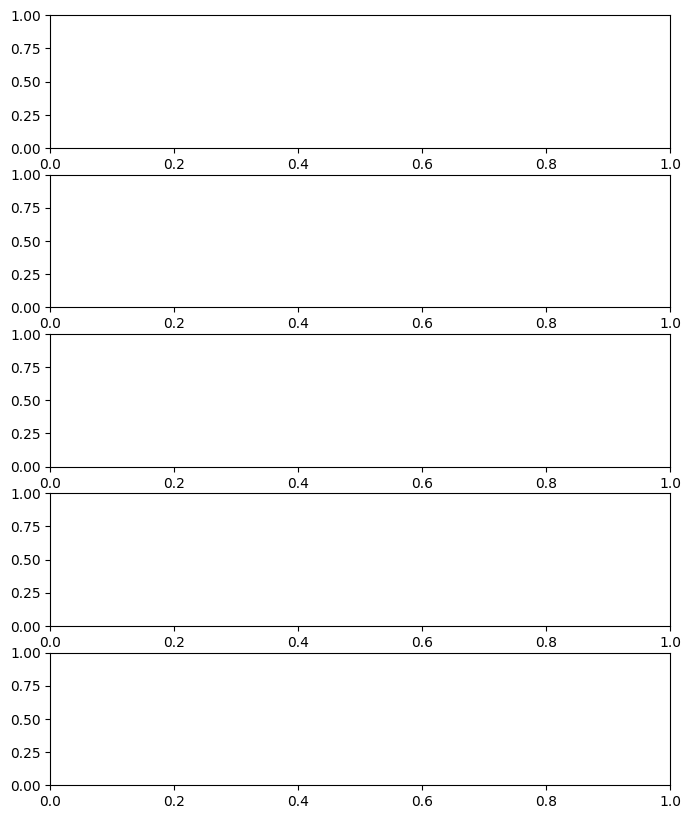

In [3]:
#Subplots with hist
fig, axs = plt.subplots(5, figsize=(8,10))

axs[0].hist(df['age'], bins=20)
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')

axs[1].hist(df['children'], bins=20)
axs[1].set_title('Children Distribution')
axs[1].set_xlabel('Children')
axs[1].set_ylabel('Count')

axs[2].hist(df['smoker'], bins=20)
axs[2].set_title('Smoker Distribution')
axs[2].set_xlabel('Smoker')
axs[2].set_ylabel('Count')

axs[3].hist(df['sex'], bins=20)
axs[3].set_title('Sex Distribution')
axs[3].set_xlabel('Sex')
axs[3].set_ylabel('Count')

axs[4].hist(df['region'], bins=20)
axs[4].set_title('Region Distribution')
axs[4].set_xlabel('Region')
axs[4].set_ylabel('Count')

plt.tight_layout()

plt.show()

In [4]:
plt.figure(figsize=(12,9))
sns.heatmap(df_dummied.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

NameError: name 'df_dummied' is not defined

<Figure size 1200x900 with 0 Axes>

In [5]:
plt.scatter(df['smoker'], df['charges'], s=5)
plt.title("Smoker - Charges")
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

NameError: name 'df' is not defined

In [6]:
smoker_charges = df[df["smoker"] == "yes"]["charges"]
non_smoker_charges = df[df["smoker"] == "no"]["charges"]

mean_smoker_charges = smoker_charges.mean()
mean_non_smoker_charges = non_smoker_charges.mean()

print(f"Mean charges for smokers: {mean_smoker_charges}")
print(f"Mean charges for non-smokers: {mean_non_smoker_charges}")

NameError: name 'df' is not defined

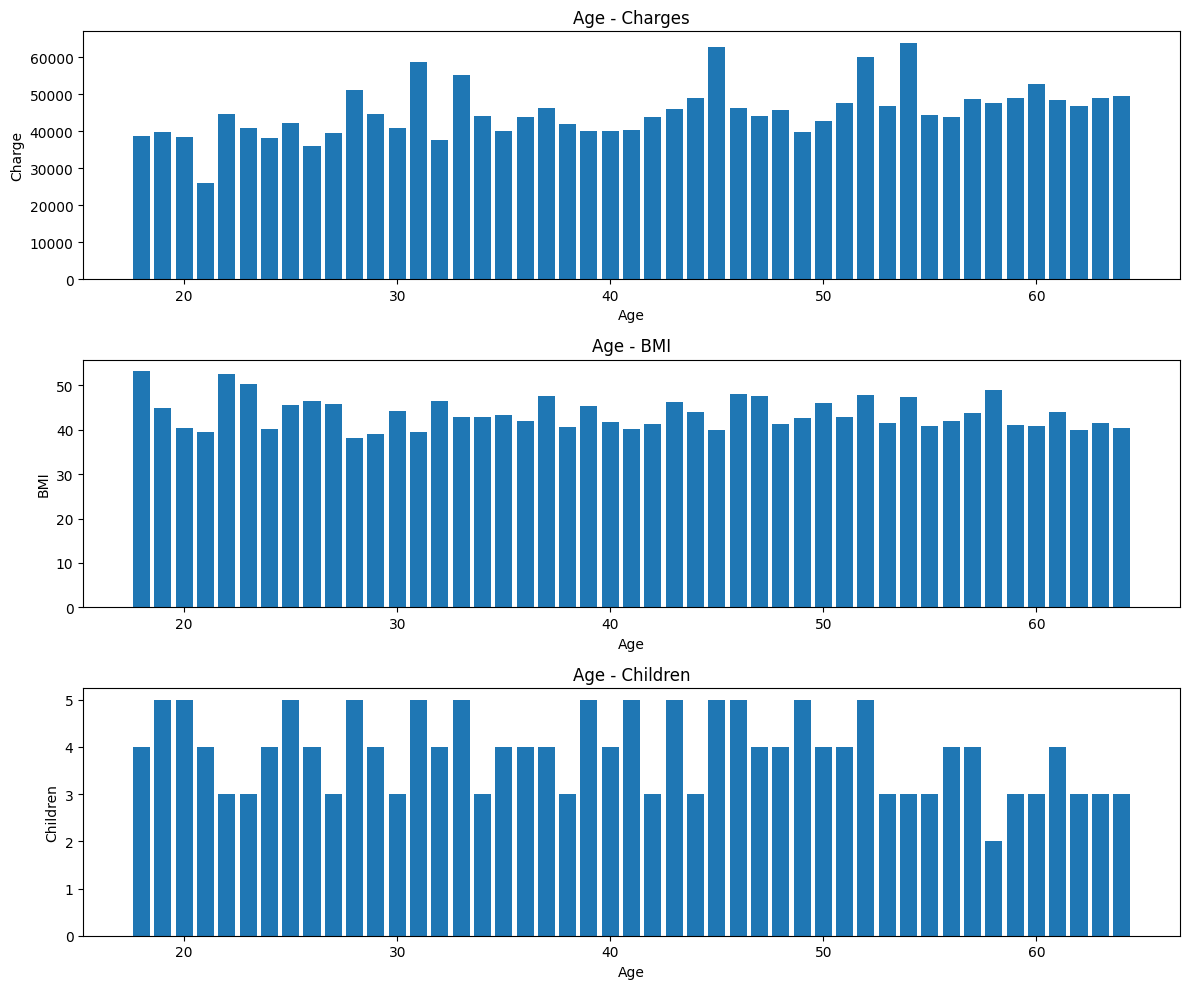

In [16]:
#subplots bar
fig, axs = plt.subplots(3, figsize=(12,10))

axs[0].bar(df['age'], df['charges'])
axs[0].set_title('Age - Charges')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Charge')

axs[1].bar(df['age'], df['bmi'])
axs[1].set_title('Age - BMI')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('BMI')

axs[2].bar(df['age'], df['children'])
axs[2].set_title('Age - Children')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Children')

plt.tight_layout()

plt.show()

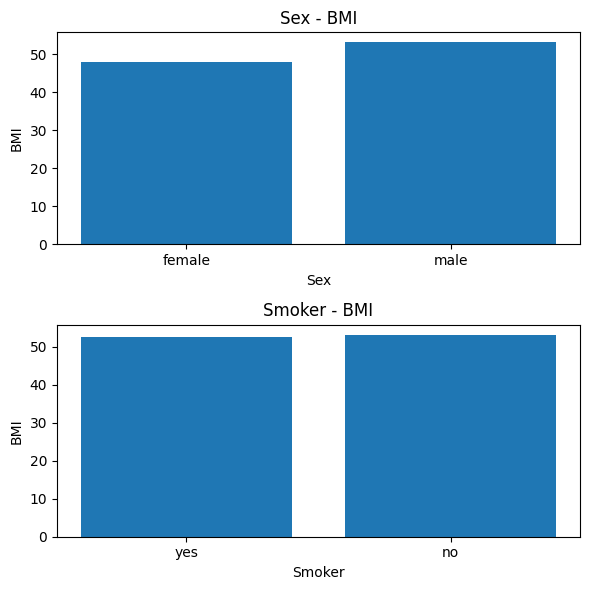

In [17]:
#subplots bar
fig, axs = plt.subplots(2, figsize=(6,6))

axs[0].bar(df['sex'], df['bmi'])
axs[0].set_title('Sex - BMI')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('BMI')

axs[1].bar(df['smoker'], df['bmi'])
axs[1].set_title('Smoker - BMI')
axs[1].set_xlabel('Smoker')
axs[1].set_ylabel('BMI')

plt.tight_layout()

plt.show()

In [18]:
#female and male smokers
df.groupby(['smoker', 'sex']).size().unstack()

sex,female,male
smoker,,
no,1134,1074
yes,232,332


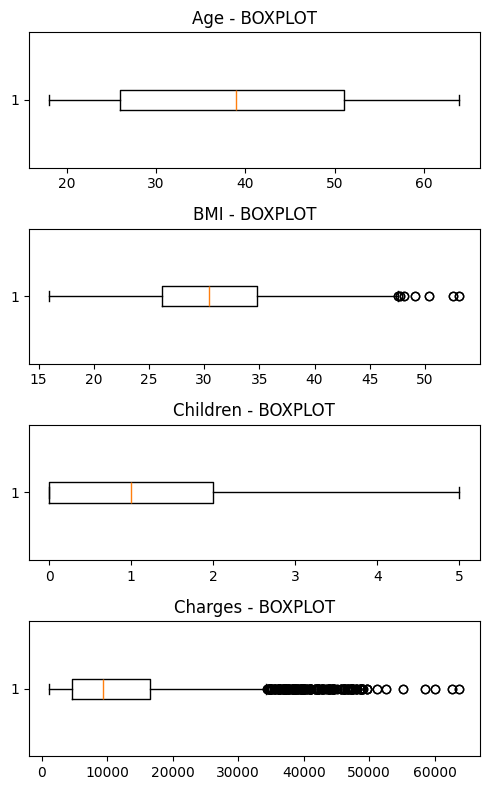

In [19]:
#subploits boxplots
fig, axs = plt.subplots(4, figsize=(5,8))

axs[0].boxplot(df['age'], vert=False)
axs[0].set_title('Age - BOXPLOT')

axs[1].boxplot(df['bmi'], vert=False)
axs[1].set_title('BMI - BOXPLOT')

axs[2].boxplot(df['children'], vert=False)
axs[2].set_title('Children - BOXPLOT')

axs[3].boxplot(df['charges'], vert=False)
axs[3].set_title('Charges - BOXPLOT')

plt.tight_layout()

plt.show()

In [7]:
 from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, roc_curve, auc

In [ ]:
#encoding data
categorical_features = ['sex', 'smoker', 'region']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
X_transformed = transformer.fit_transform(df.drop('charges', axis=1))
y = df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [ ]:
#calling models function
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
}

In [ ]:
print("Regression Models Evaluation:")
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2_score_model = r2_score(y_test, predictions)
    mse_score = mean_squared_error(y_test, predictions)
    mae_score = mean_absolute_error(y_test, predictions)
    print("Model:", name)
    print("R2 Score:", r2_score_model)
    print("MSE Score:", mse_score)
    print("MAE Score:", mae_score)
    print()

In [ ]:
# User Input Function
def get_user_input():
    age = int(input("Enter age: "))
    sex = input("Enter sex (male/female): ")
    bmi = float(input("Enter BMI: "))
    children = int(input("Enter number of children: "))
    smoker = input("Enter smoker (yes/no): ")
    region = input("Enter region (southwest/southeast/northwest/northeast): ")

    return age, sex, bmi, children, smoker, region

# Get user input
age, sex, bmi, children, smoker, region = get_user_input()


In [ ]:
# Create a sample input (like a DataFrame)
user_data = pd.DataFrame([[age, sex, bmi, children, smoker, region]], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])


In [ ]:
# Apply the same transformations
user_data_transformed = transformer.transform(user_data)

In [ ]:
# Regression Predictions
print("\nRegression Predictions:")
for name, model in models.items():
    prediction = model.predict(user_data_transformed)[0]  # Get the single prediction
    print(f"{name}: Predicted charges: ${prediction:.2f}")

In [ ]:
import pickle

In [ ]:
models = {
    
    "Random Forest Regression": RandomForestRegressor()
    
}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2_score_model = r2_score(y_test, predictions)
    mse_score = mean_squared_error(y_test, predictions)
    mae_score = mean_absolute_error(y_test, predictions)
    print("Model:", name)
    print("R2 Score:", r2_score_model)
    print("MSE Score:", mse_score)
    print("MAE Score:", mae_score)
    print()

In [ ]:
with open('trained_model','wb') as f:
	pickle.dump(model,f)

In [ ]:
predictions

In [ ]:
y_test